## Import 

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [23]:
df = pd.read_csv('../data/train.csv')

## Explore Data

In [24]:
df.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 125000 non-null  int64  
 1   age                         125000 non-null  int64  
 2   location                    125000 non-null  object 
 3   subscription_type           125000 non-null  object 
 4   payment_plan                125000 non-null  object 
 5   num_subscription_pauses     125000 non-null  int64  
 6   payment_method              125000 non-null  object 
 7   customer_service_inquiries  125000 non-null  object 
 8   signup_date                 125000 non-null  int64  
 9   weekly_hours                125000 non-null  float64
 10  average_session_length      125000 non-null  float64
 11  song_skip_rate              125000 non-null  float64
 12  weekly_songs_played         125000 non-null  int64  
 13  weekly_unique_

In [26]:
df.describe()

,customer_id,age,num_subscription_pauses,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
count,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,62500.500000,48.414136,1.991144,-1460.678936,25.036985,60.421725,0.500802,250.823928,150.783344,24.499888,99.713240,49.458048,24.554224,24.446848,0.513392
std,36084.536162,17.901042,1.417201,844.132871,14.447487,34.383782,0.288706,143.327606,85.794952,14.445979,57.681372,28.935305,14.454823,14.422850,0.499823
min,1.000000,18.000000,0.000000,-2922.000000,0.000068,1.000526,0.000006,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31250.750000,33.000000,1.000000,-2190.000000,12.472667,30.644177,0.250974,127.000000,76.000000,12.000000,50.000000,24.000000,12.000000,12.000000,0.000000
50%,62500.500000,48.000000,2.000000,-1462.000000,25.116710,60.340977,0.501162,251.000000,150.000000,25.000000,100.000000,49.000000,25.000000,24.000000,1.000000
75%,93750.250000,64.000000,3.000000,-728.000000,37.570328,90.234158,0.751110,375.000000,225.000000,37.000000,150.000000,75.000000,37.000000,37.000000,1.000000
max,125000.000000,79.000000,4.000000,-1.000000,49.999943,119.996501,0.999970,499.000000,299.000000,49.000000,199.000000,99.000000,49.000000,49.000000,1.000000


In [27]:
df.dtypes

customer_id                     int64
age                             int64
location                       object
subscription_type              object
payment_plan                   object
num_subscription_pauses         int64
payment_method                 object
customer_service_inquiries     object
signup_date                     int64
weekly_hours                  float64
average_session_length        float64
song_skip_rate                float64
weekly_songs_played             int64
weekly_unique_songs             int64
num_favorite_artists            int64
num_platform_friends            int64
num_playlists_created           int64
num_shared_playlists            int64
notifications_clicked           int64
churned                         int64
dtype: object

## Data Cleaning

- 결측치 확인

In [28]:
df.isnull().sum()

customer_id                   0
age                           0
location                      0
subscription_type             0
payment_plan                  0
num_subscription_pauses       0
payment_method                0
customer_service_inquiries    0
signup_date                   0
weekly_hours                  0
average_session_length        0
song_skip_rate                0
weekly_songs_played           0
weekly_unique_songs           0
num_favorite_artists          0
num_platform_friends          0
num_playlists_created         0
num_shared_playlists          0
notifications_clicked         0
churned                       0
dtype: int64

- IQR을 사용한 이상치 확인

In [29]:
def find_outliers_IQR(df):
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    return outliers

outliers_IQR = find_outliers_IQR(df)
print("IQR Outliers:")
print(outliers_IQR.sum())

IQR Outliers:
customer_id                0
age                        0
num_subscription_pauses    0
signup_date                0
weekly_hours               0
average_session_length     0
song_skip_rate             0
weekly_songs_played        0
weekly_unique_songs        0
num_favorite_artists       0
num_platform_friends       0
num_playlists_created      0
num_shared_playlists       0
notifications_clicked      0
churned                    0
dtype: int64


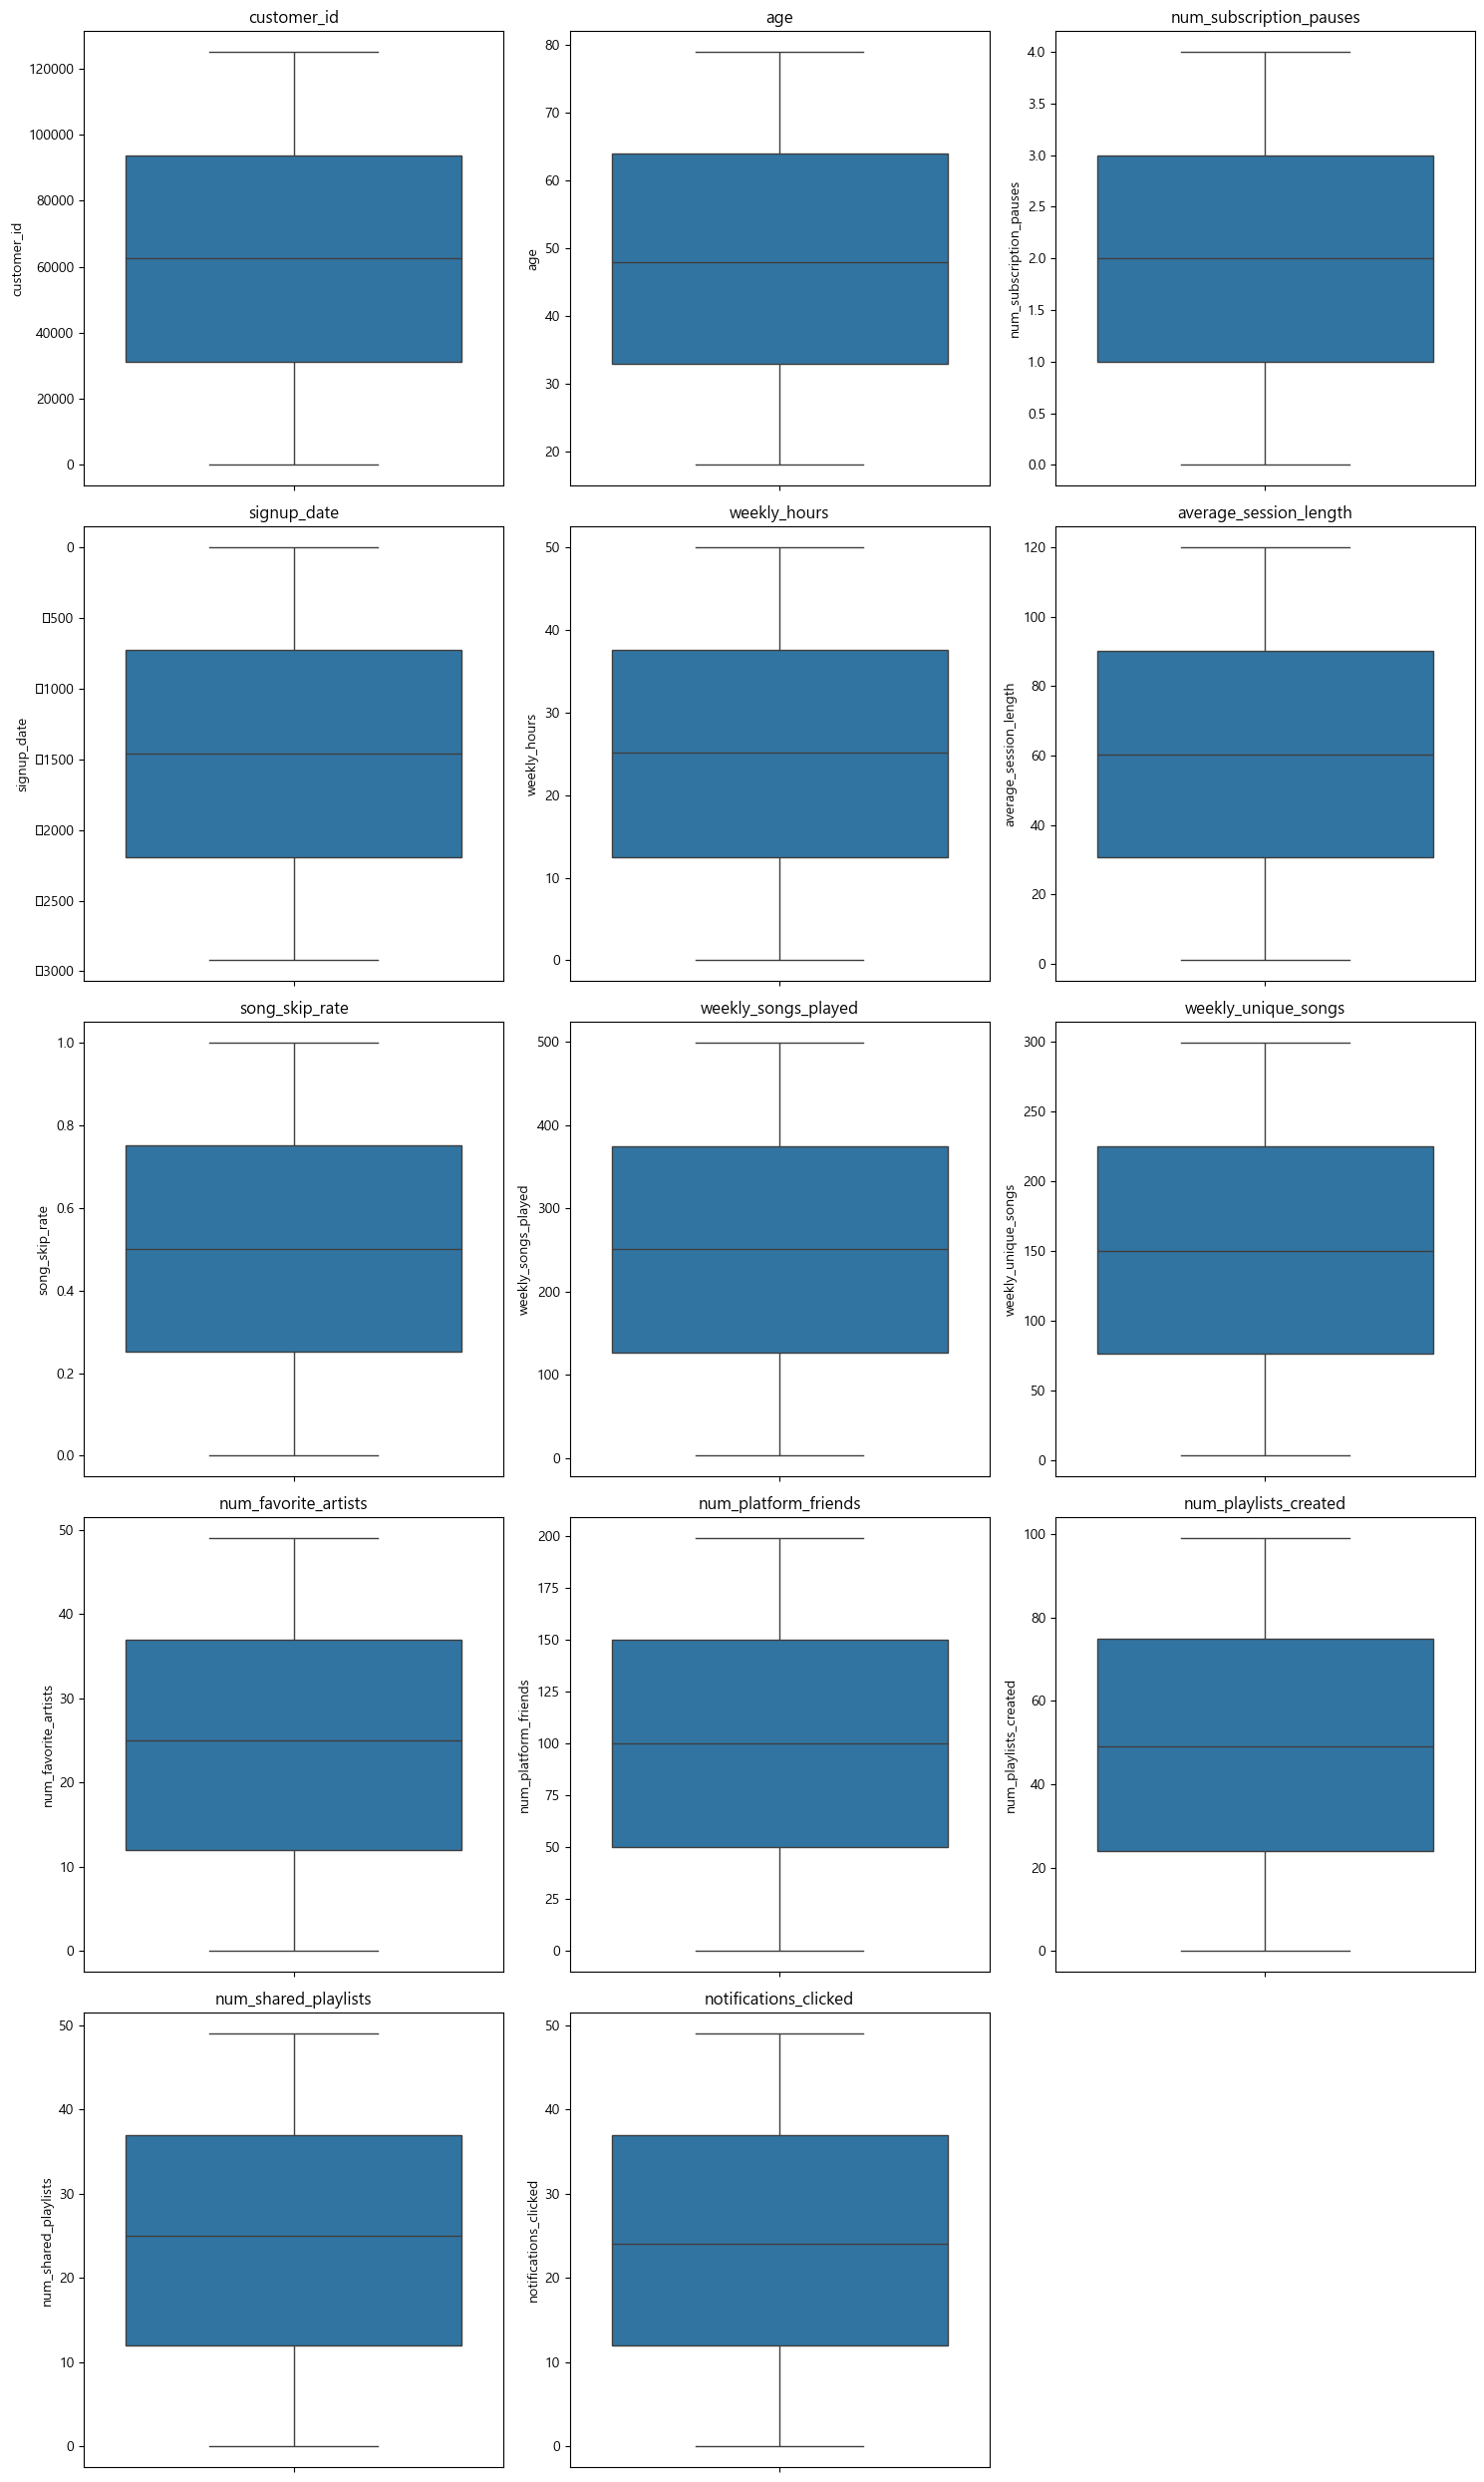

In [30]:
# 박스 플롯을 사용한 이상치 시각화
def plot_boxplots(df, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]  # 제외할 열 제거

    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # churned 열을 제외하고 시각화
plot_boxplots(df, exclude_cols=['churned'])

## Feature Engineering

#### 평균 재생 시간 당 곡수 (songs_per_hours)
- 주간 청취 시간 대비 평균 재생 곡수

In [31]:
df['songs_per_hours'] = df['weekly_songs_played'] / df['weekly_hours'] 


#### 가입 이후 경과 일수 (days_since_signup)
- (raw) "가입 날짜 - 현재 날짜" => - (negative)
- (new) raw 값에 절대값을 씌어 + (positive) 값으로 변환하여 보다 직관적으로 표현

In [32]:
df['signup_date_positive'] = np.abs(df['signup_date'].values)


### Engagement
- 사용자가 직접적인 행동(action)을 하는 것이라고 판단되는 feature

In [33]:
df['engagement_score'] = (df['notifications_clicked'] + df['num_playlists_created'] + df['num_shared_playlists']) / 3


## 상관관계 시각화

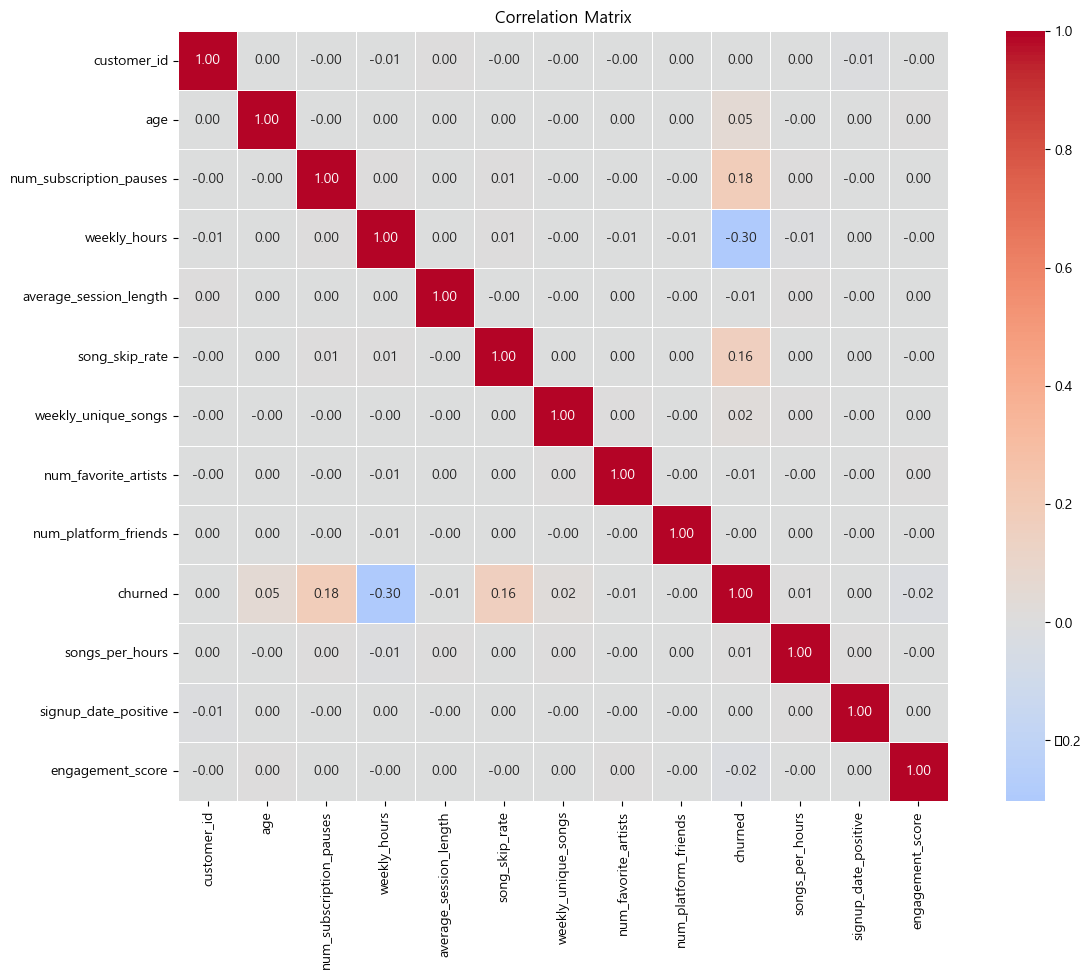

In [35]:
df2 = df[:]
df2.drop(['weekly_songs_played'],axis=1,inplace=True)
df2.drop('signup_date',axis=1,inplace=True)
df2.drop(['notifications_clicked','num_playlists_created','num_shared_playlists'],axis=1,inplace=True)

numeric_cols = df2.select_dtypes(include=[np.number]).columns

corr_matrix = df2[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5, center=0)
plt.title('Correlation Matrix')
plt.show()

## Feature Preprocessing

- 원핫 인코딩

In [36]:
# category type으로 바꿔주기
col = ['location', 'subscription_type', 'payment_plan', 'num_subscription_pauses', 'payment_method', 'customer_service_inquiries']

for i in col:
    df[i] = df[i].astype('category')

df= pd.get_dummies(df, columns=['subscription_type','num_subscription_pauses','customer_service_inquiries'])


- 로그 변환

In [37]:
def log_change(columns):
    df[columns] = np.log(df[columns] + 1)
    return df[columns]

X = ['age', 'signup_date_positive', 'weekly_hours', 'average_session_length', 'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends', 'num_playlists_created', 'num_shared_playlists', 'notifications_clicked', 'songs_per_hours', 'engagement_score']

for i in X:
    log_change(i)

- 정규화

In [38]:
def standardize_dataframe(df,columns_to_standardize):
    scalar = StandardScaler()
    df[columns_to_standardize] = scalar.fit_transform(df[columns_to_standardize])
    return df

# 정규화할 열 선택
columns_to_standardize = ['age', 'signup_date_positive', 'weekly_hours', 'average_session_length', 'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends', 'num_playlists_created', 'num_shared_playlists', 'notifications_clicked', 'songs_per_hours', 'engagement_score', 'song_skip_rate']

# 정규화 적용
df = standardize_dataframe(df,columns_to_standardize)

In [39]:
df.to_csv('../data/preprocessing_data.csv', index=False)